In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Seaborn_brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: >

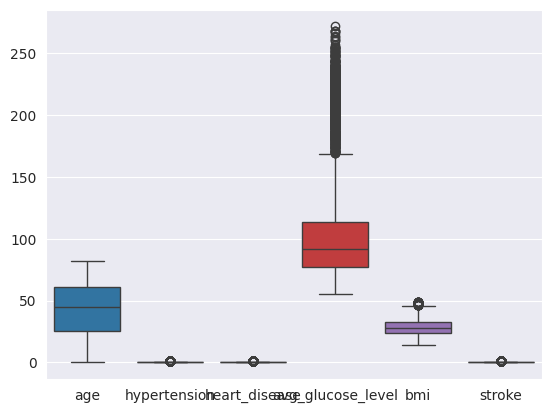

In [7]:
sns.boxplot(data=data)

<Axes: xlabel='avg_glucose_level'>

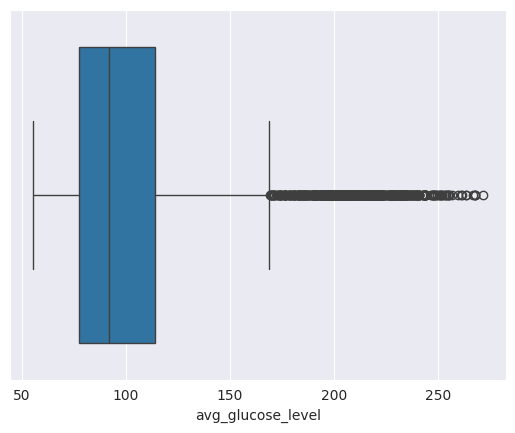

In [8]:
sns.boxplot(x='avg_glucose_level',data=data)

In [9]:
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'Male'

<Axes: xlabel='hypertension'>

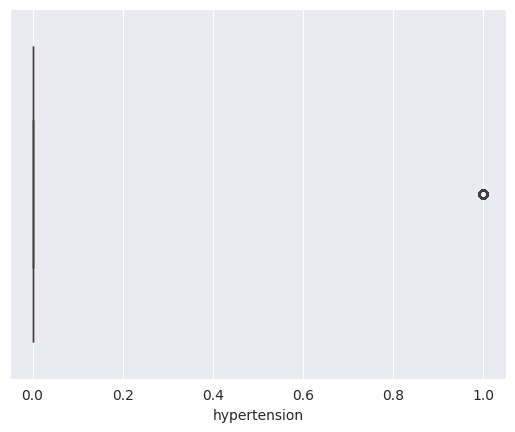

In [10]:
sns.boxplot(x='hypertension',data=data)

In [11]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [12]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
categorial = data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
categorial

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
4976,Male,No,Private,Rural,formerly smoked
4977,Male,Yes,Private,Urban,smokes
4978,Female,Yes,Govt_job,Rural,smokes
4979,Male,Yes,Private,Rural,smokes


In [14]:
data_binary = data[['hypertension', 'heart_disease', 'stroke']]
data_binary

,hypertension,heart_disease,stroke
0,0,1,1
1,0,1,1
2,0,0,1
3,1,0,1
4,0,0,1
...,...,...,...
4976,0,0,0
4977,0,0,0
4978,1,0,0
4979,0,0,0


In [15]:
data_outliers = data[['age', 'avg_glucose_level', 'bmi']]
data_outliers

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4976,41.0,70.15,29.8
4977,40.0,191.15,31.1
4978,45.0,95.02,31.8
4979,40.0,83.94,30.0


In [16]:
# Fonction pour détecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [17]:
replace_outliers(data_outliers)

/tmp/ipykernel_17641/678717177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
/tmp/ipykernel_17641/678717177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
/tmp/ipykernel_17641/678717177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [18]:
data_clean = pd.concat([data_binary,data_outliers, categorial], axis=1)
data_clean

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0,1,1,67.0,168.805,36.6,Male,Yes,Private,Urban,formerly smoked
1,0,1,1,80.0,105.920,32.5,Male,Yes,Private,Rural,never smoked
2,0,0,1,49.0,168.805,34.4,Female,Yes,Private,Urban,smokes
3,1,0,1,79.0,168.805,24.0,Female,Yes,Self-employed,Rural,never smoked
4,0,0,1,81.0,168.805,29.0,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,Male,No,Private,Rural,formerly smoked
4977,0,0,0,40.0,168.805,31.1,Male,Yes,Private,Urban,smokes
4978,1,0,0,45.0,95.020,31.8,Female,Yes,Govt_job,Rural,smokes
4979,0,0,0,40.0,83.940,30.0,Male,Yes,Private,Rural,smokes


<Axes: xlabel='avg_glucose_level'>

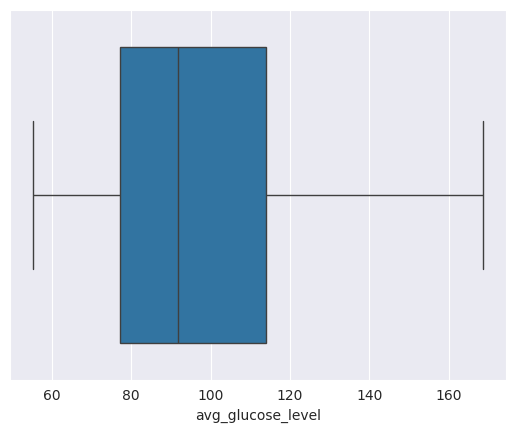

In [19]:
sns.boxplot(x='avg_glucose_level',data=data_clean)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_clean.gender = label_encoder.fit_transform(data_clean.gender)
data_clean.ever_married = label_encoder.fit_transform(data_clean.ever_married)
data_clean

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,0,1,1,67.0,168.805,36.6,1,1,Private,Urban,formerly smoked
1,0,1,1,80.0,105.920,32.5,1,1,Private,Rural,never smoked
2,0,0,1,49.0,168.805,34.4,0,1,Private,Urban,smokes
3,1,0,1,79.0,168.805,24.0,0,1,Self-employed,Rural,never smoked
4,0,0,1,81.0,168.805,29.0,1,1,Private,Urban,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,1,0,Private,Rural,formerly smoked
4977,0,0,0,40.0,168.805,31.1,1,1,Private,Urban,smokes
4978,1,0,0,45.0,95.020,31.8,0,1,Govt_job,Rural,smokes
4979,0,0,0,40.0,83.940,30.0,1,1,Private,Rural,smokes


In [21]:
def frequency_encoder(data, column_name):
    """
    Encode les valeurs catégorielles d'une colonne en utilisant leur fréquence d'apparition.

    Paramètres:
    - data : DataFrame Pandas contenant les données.
    - column_name : nom de la colonne catégorielle à encoder.

    Retourne:
    - Une copie du DataFrame avec une colonne encodée par fréquence ajoutée.
    """
    # Créer une copie pour éviter de modifier l'original
    data_encoded = data.copy()
    
    # Calculer la fréquence d'apparition de chaque catégorie
    frequency_map = data[column_name].value_counts(normalize=True)
    
    # Remplacer les catégories par leur fréquence
    data_encoded[f"{column_name}_encoded"] = data[column_name].map(frequency_map)
    
    return data_encoded

In [22]:
data_encoded = frequency_encoder(data_clean, 'work_type')
data_encoded

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,work_type_encoded
0,0,1,1,67.0,168.805,36.6,1,1,Private,Urban,formerly smoked,0.574182
1,0,1,1,80.0,105.920,32.5,1,1,Private,Rural,never smoked,0.574182
2,0,0,1,49.0,168.805,34.4,0,1,Private,Urban,smokes,0.574182
3,1,0,1,79.0,168.805,24.0,0,1,Self-employed,Rural,never smoked,0.161413
4,0,0,1,81.0,168.805,29.0,1,1,Private,Urban,formerly smoked,0.574182
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,1,0,Private,Rural,formerly smoked,0.574182
4977,0,0,0,40.0,168.805,31.1,1,1,Private,Urban,smokes,0.574182
4978,1,0,0,45.0,95.020,31.8,0,1,Govt_job,Rural,smokes,0.129291
4979,0,0,0,40.0,83.940,30.0,1,1,Private,Rural,smokes,0.574182


In [23]:
data_encoded = frequency_encoder(data_clean, 'Residence_type')
data_encoded

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,Residence_type_encoded
0,0,1,1,67.0,168.805,36.6,1,1,Private,Urban,formerly smoked,0.508332
1,0,1,1,80.0,105.920,32.5,1,1,Private,Rural,never smoked,0.491668
2,0,0,1,49.0,168.805,34.4,0,1,Private,Urban,smokes,0.508332
3,1,0,1,79.0,168.805,24.0,0,1,Self-employed,Rural,never smoked,0.491668
4,0,0,1,81.0,168.805,29.0,1,1,Private,Urban,formerly smoked,0.508332
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,1,0,Private,Rural,formerly smoked,0.491668
4977,0,0,0,40.0,168.805,31.1,1,1,Private,Urban,smokes,0.508332
4978,1,0,0,45.0,95.020,31.8,0,1,Govt_job,Rural,smokes,0.491668
4979,0,0,0,40.0,83.940,30.0,1,1,Private,Rural,smokes,0.491668


In [24]:
data_encoded = frequency_encoder(data_clean, 'smoking_status')
data_encoded

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,smoking_status_encoded
0,0,1,1,67.0,168.805,36.6,1,1,Private,Urban,formerly smoked,0.174061
1,0,1,1,80.0,105.920,32.5,1,1,Private,Rural,never smoked,0.369002
2,0,0,1,49.0,168.805,34.4,0,1,Private,Urban,smokes,0.155792
3,1,0,1,79.0,168.805,24.0,0,1,Self-employed,Rural,never smoked,0.369002
4,0,0,1,81.0,168.805,29.0,1,1,Private,Urban,formerly smoked,0.174061
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,1,0,Private,Rural,formerly smoked,0.174061
4977,0,0,0,40.0,168.805,31.1,1,1,Private,Urban,smokes,0.155792
4978,1,0,0,45.0,95.020,31.8,0,1,Govt_job,Rural,smokes,0.155792
4979,0,0,0,40.0,83.940,30.0,1,1,Private,Rural,smokes,0.155792


In [25]:
data_clean = data_clean.drop(['work_type', 'Residence_type', 'smoking_status'], axis=1)
data_clean

,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi,gender,ever_married
0,0,1,1,67.0,168.805,36.6,1,1
1,0,1,1,80.0,105.920,32.5,1,1
2,0,0,1,49.0,168.805,34.4,0,1
3,1,0,1,79.0,168.805,24.0,0,1
4,0,0,1,81.0,168.805,29.0,1,1
...,...,...,...,...,...,...,...,...
4976,0,0,0,41.0,70.150,29.8,1,0
4977,0,0,0,40.0,168.805,31.1,1,1
4978,1,0,0,45.0,95.020,31.8,0,1
4979,0,0,0,40.0,83.940,30.0,1,1


In [46]:
data_clean.stroke.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [26]:
X = data_clean.drop(['stroke'], axis=1)
y = data_clean[['stroke']]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [29]:
X_train_sc

array([[-0.32206118,  4.11785512,  0.52352746, ...,  1.5472913 ,
        -0.85813849,  0.72593583],
       [-0.32206118, -0.24284487, -0.01071294, ...,  1.13368576,
         1.16531307,  0.72593583],
       [-0.32206118, -0.24284487, -1.39083397, ..., -1.0672866 ,
        -0.85813849, -1.37753223],
       ...,
       [-0.32206118, -0.24284487,  0.07832713, ..., -0.062816  ,
        -0.85813849,  0.72593583],
       [-0.32206118, -0.24284487, -1.79151427, ..., -1.7320098 ,
        -0.85813849, -1.37753223],
       [-0.32206118, -0.24284487, -1.21275384, ..., -0.87525546,
         1.16531307, -1.37753223]])

In [30]:
y_train

,stroke
3312,0
3073,0
1913,0
95,1
2840,0
...,...
2862,0
1451,0
1056,0
1533,0


In [31]:
from keras.models import Sequential
from keras.layers import Dense

2024-11-09 11:16:36.749188: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 11:16:36.752921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 11:16:36.762210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731147396.779057   17641 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731147396.784156   17641 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 11:16:36.803212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [32]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1731147398.594462   17641 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [33]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
model = classifier.fit(X_train_sc, y_train, batch_size = 16, epochs = 20, validation_split = 0.2)

Epoch 1/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.6379 - val_accuracy: 0.9585 - val_loss: 0.2638
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.2346 - val_accuracy: 0.9585 - val_loss: 0.1530
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9513 - loss: 0.1677 - val_accuracy: 0.9585 - val_loss: 0.1457
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.1726 - val_accuracy: 0.9585 - val_loss: 0.1423
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1734 - val_accuracy: 0.9585 - val_loss: 0.1417
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1494 - val_accuracy: 0.9585 - val_loss: 0.1413
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9448 - loss: 0.1729 - val_accuracy: 0.9585 - val_loss: 0.1402
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9451 - loss: 0.1692 - val_accuracy: 0.

In [36]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

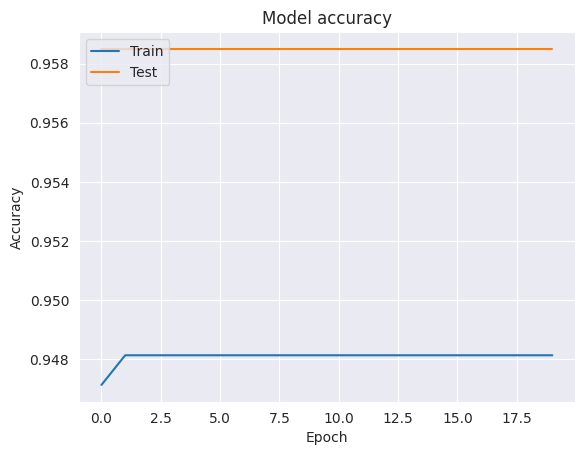

In [37]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

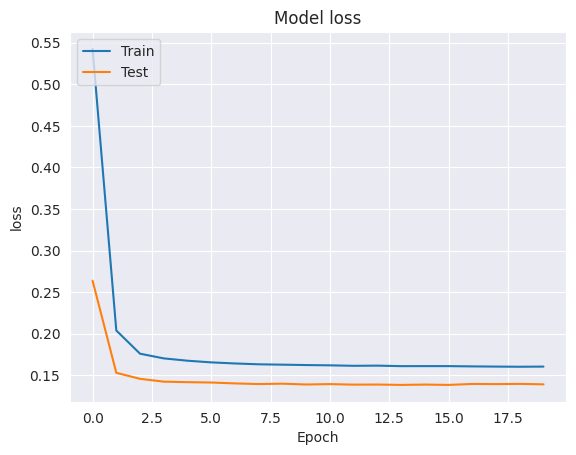

In [38]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Evaluer la classification

In [40]:
y_pred = classifier.predict(X_test_sc)
y_pred

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


array([[1.3916329e-01],
       [1.5879479e-04],
       [1.7786186e-02],
       ...,
       [8.0072053e-04],
       [2.9656196e-02],
       [1.9477183e-01]], dtype=float32)

In [41]:
y_pred = (y_pred > 0.5)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

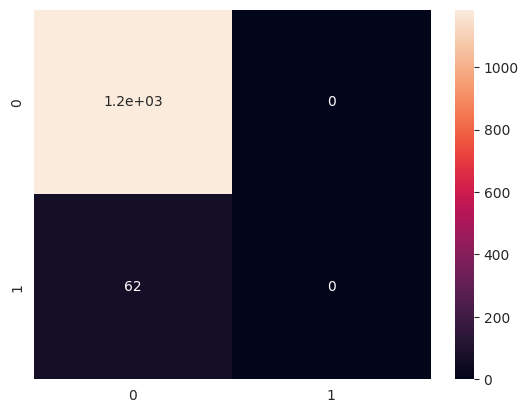

In [43]:
sns.heatmap(cm, annot=True)

In [45]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1184
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1246
   macro avg       0.48      0.50      0.49      1246
weighted avg       0.90      0.95      0.93      1246



/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ariel/PycharmProjects/enronmails/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo